### About the Dataset

This dataset contains a cleaned version of the dataset from UCI Machine Learning Repository on credit card approvals.

Missing values have been filled and feature names and categorical names have been inferred, resulting in more context and it being easier to use.

Story: What influences credit card approval?

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
file_path = "../data/clean_dataset.csv"
dataset = pd.read_csv(filepath_or_buffer=file_path)

### Explore the Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [4]:
dataset.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


`Gender`:
- 0: Female
- 1: Male

`Age`: 
- In years

`Debt`:
- Outstanding debt (*scaled*)

`Married`:
- 0: Single/Divorce/etc.
- 1: Married

`BankCustomer`:
- 0: Does not have a bank account
- 1: Has a bank account

`Industry`:
- Job sector of current or most recent job

`Ethnicity`:
- Ethnicity

`YearsEmployed`:
- Years employed

`PriorDefault`:
- 0: No prior defaults
- 1: Prior defaults

`Employed`:
- 0: Not employed
- 1: Employed

`CreditScore`:
- Credit score (*scaled*)

`DriversLicense`:
- 0: No license
- 1: Has license

`Citizen`:
- ByBirth
- ByOtherMeans
- Temporary

`ZipCode`:
- Zip code (5 digits)

`Income`:
- Income (*scaled*)

`Approved`:
- 0: Not approved
- 1: Approved

In [5]:
# Convert Age to int for better understanding
dataset["Age"] = dataset["Age"].astype(int)

# Unscale Debt 
dataset["Debt"] = dataset["Debt"] * 1000

We are going to use the data as is because we do not have any information of what method was used to scale some features.

In [6]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58,4460.0,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24,500.0,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27,1540.0,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20,5625.0,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


## Credit Card Approvals

In [7]:
sns.set_theme(context="notebook", style="whitegrid")

What is the relation between approved and declined credit cards applications?

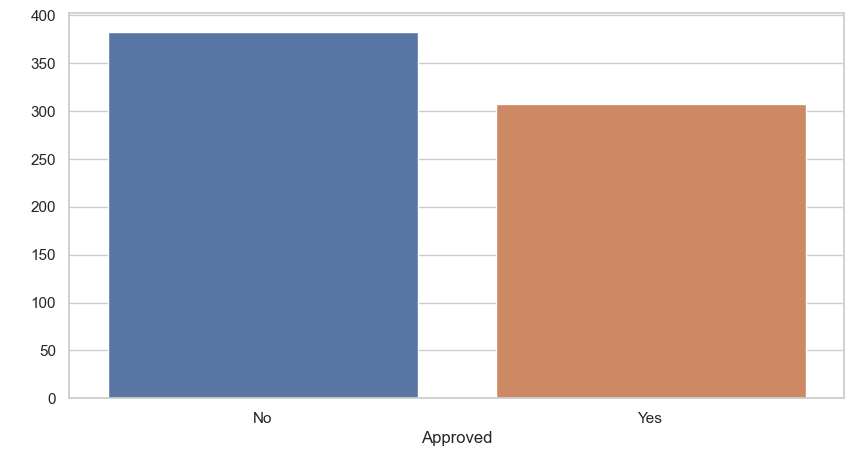

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=dataset,
                   x="Approved")
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel(" ")
plt.show()

In [9]:
print("Total applicants: {}".format(dataset.shape[0]))

Total applicants: 690


We can see here that more people  got declined their credit card application.

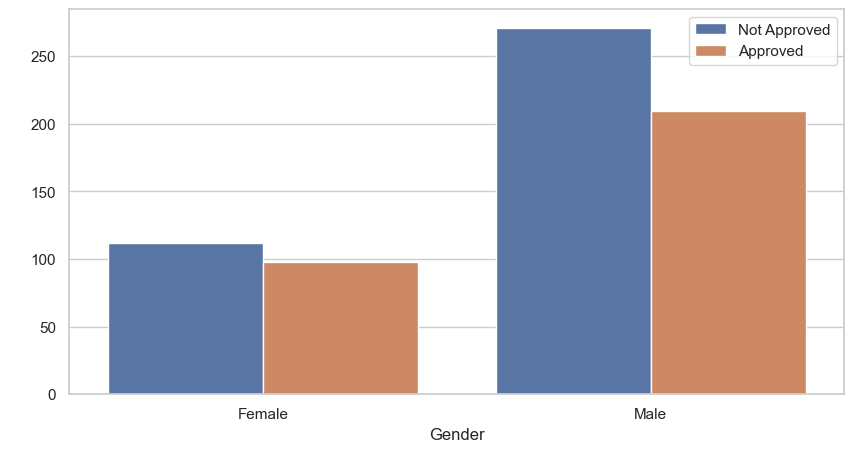

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax  = sns.countplot(data=dataset,
                    x="Gender", 
                    hue="Approved")
ax.set_xticklabels(["Female", "Male"])
plt.legend(labels=["Not Approved", "Approved"])
ax.set(ylabel=" ")
plt.show()

There is a greater number of male applicants. 

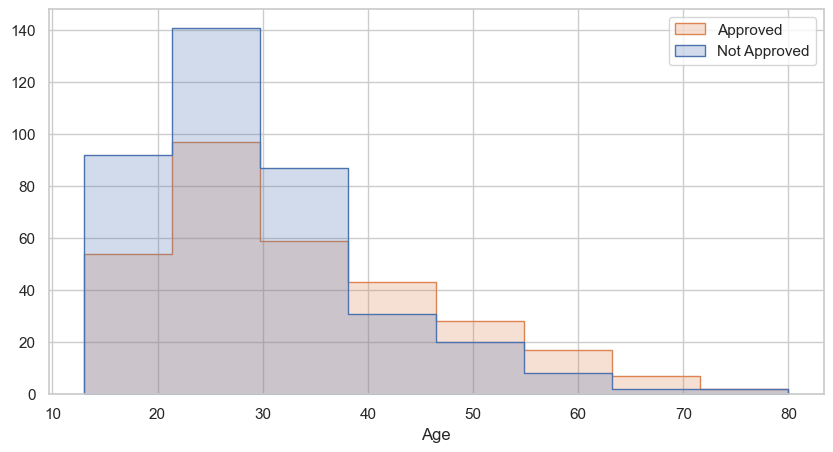

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=dataset, x="Age", 
                  bins=8, stat="count", legend=False,
                  hue="Approved", element="step")
ax.set_ylabel("")
plt.legend(labels=["Approved", "Not Approved"])
plt.show()

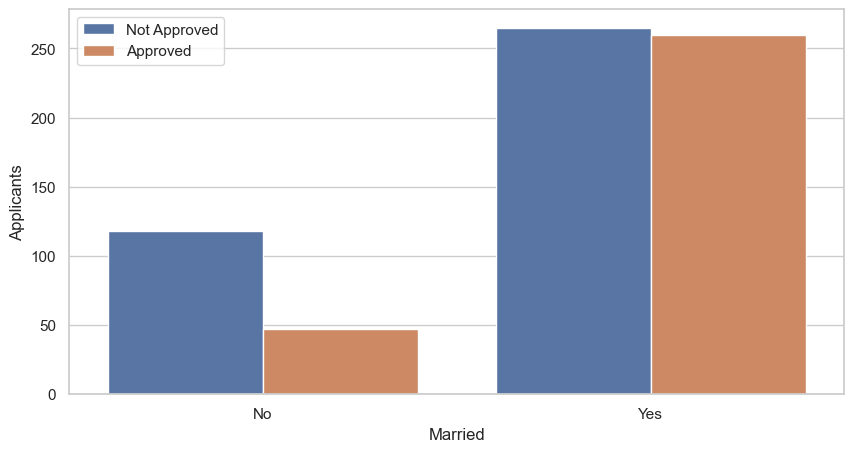

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=dataset, x="Married", hue="Approved")
ax.legend(labels=["Not Approved", "Approved"])
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("Applicants")
plt.show()

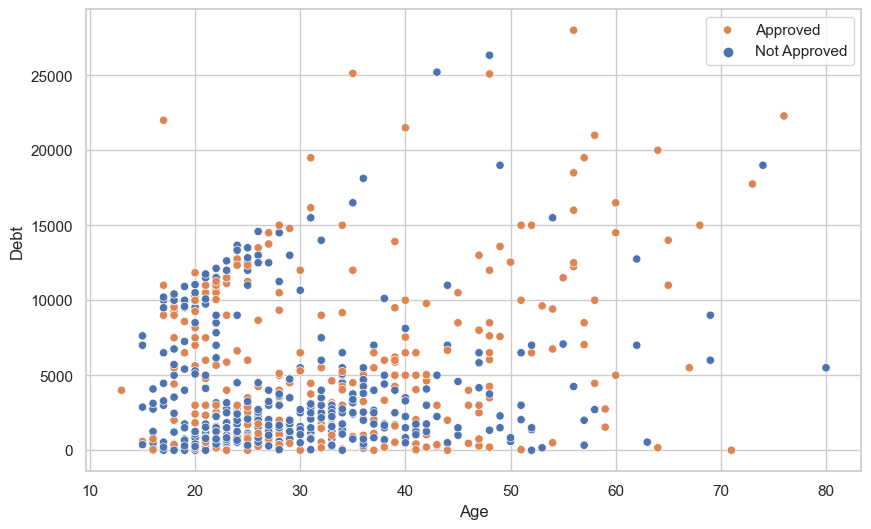

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=dataset, x="Age", y="Debt",  
    hue="Approved")
plt.legend(labels=["Approved", "Not Approved"])
plt.show()

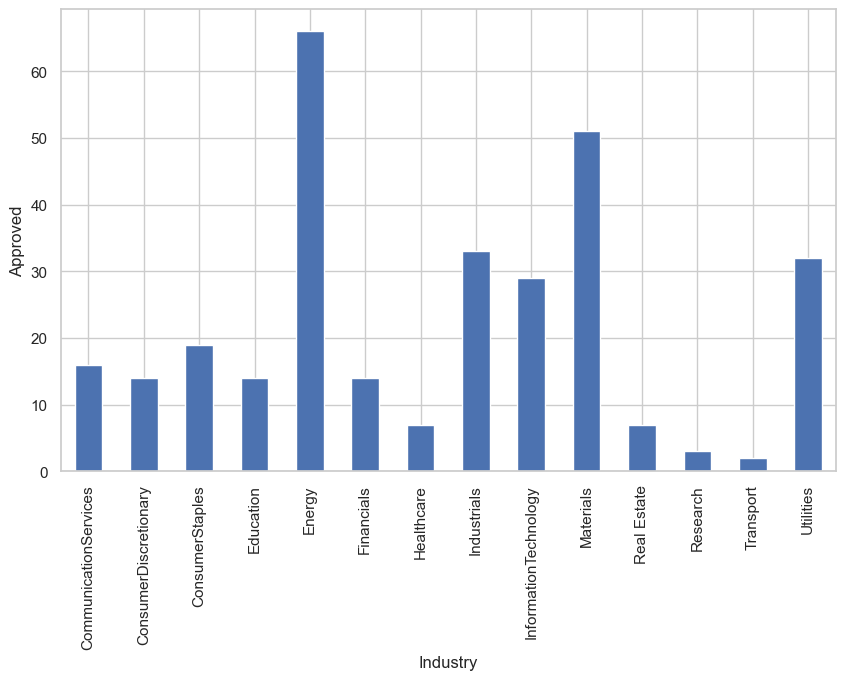

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Industry"])["Approved"].sum().plot(kind="bar")
ax.set_ylabel("Approved")
plt.show()

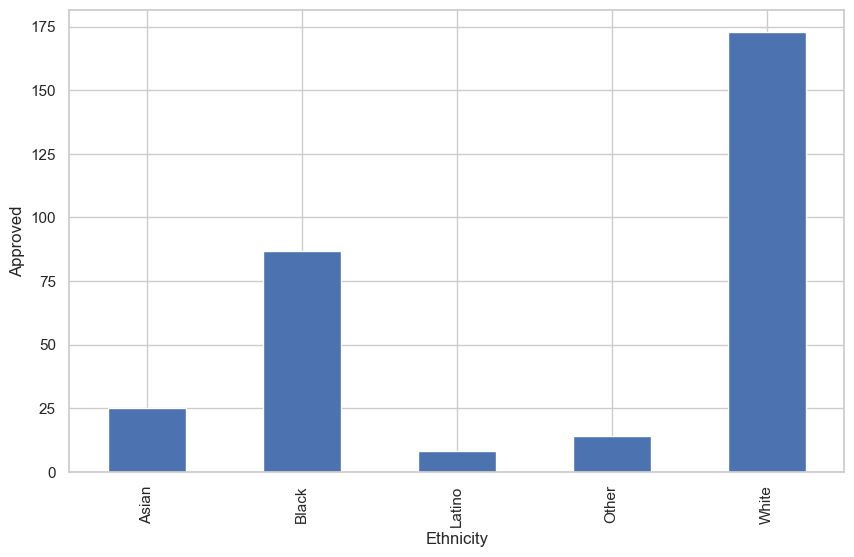

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Ethnicity"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approved")
plt.show()

In [16]:
dataset.groupby(by=["Ethnicity"])["Approved"].sum().sum()

307

In [17]:
dataset["Approved"].value_counts()

0    383
1    307
Name: Approved, dtype: int64

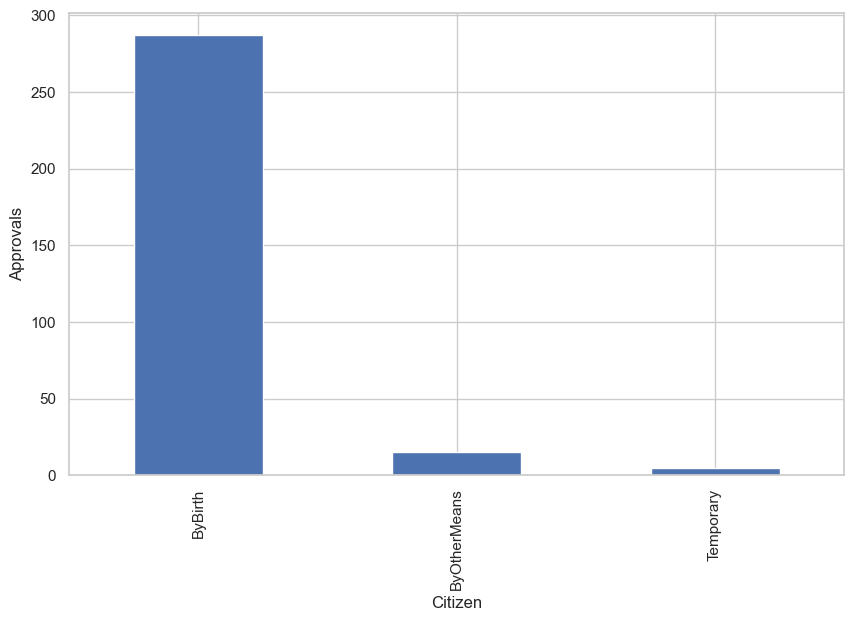

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["Citizen"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approvals")
plt.show()

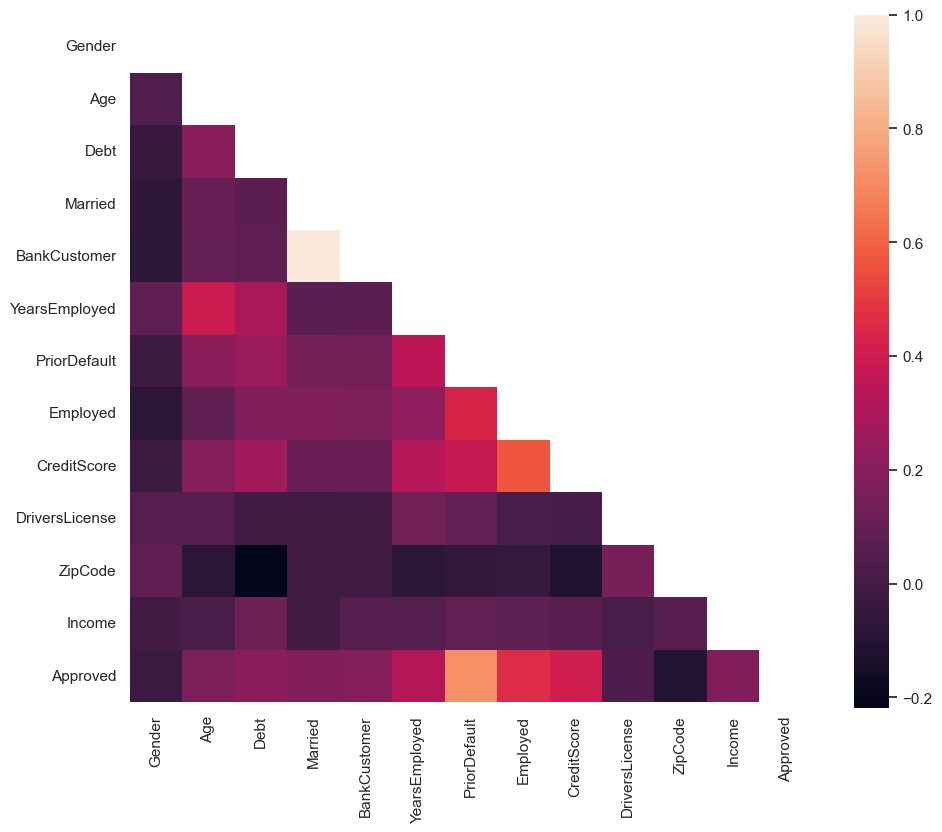

In [19]:
# Correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr, mask=mask, square=True, vmax=1)
plt.show()

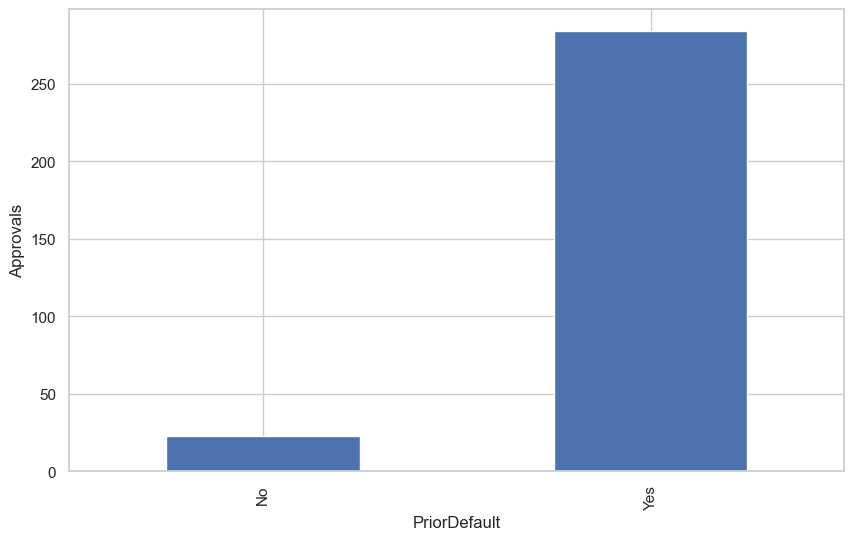

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = dataset.groupby(by=["PriorDefault"])["Approved"].sum().plot(kind="bar")
ax.set(ylabel="Approvals",
       xticklabels=["No", "Yes"])
plt.show()

In [21]:
dataset.groupby(by=["PriorDefault"])["Approved"].sum()

PriorDefault
0     23
1    284
Name: Approved, dtype: int64

In [22]:
dataset["Approved"].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [23]:
dataset["PriorDefault"].plot(kind="hist", hue=")

SyntaxError: unterminated string literal (detected at line 1) (3503912225.py, line 1)

In [ ]:
sns.histplot(data=dataset, x="PriorDefault", hue="Approved", element="step", bins=2)